# Getting Population data

This page demonstrates the use of the population class.
This class helps getting data about the demography in different areas.

## Finding the population within a polygon

For example, we will use it to get data about the population in Tel Aviv.
When using it, we have to deliver either a shapely polygon to use or a string.
The string may be a name of a saved Geometry in the database or a name used
as a CutName when cutting an area for a new document.
In this example, we already have a document whose CutName is "TelAviv" in the database.

In [1]:
from hera import GIS
population = GIS.population(projectName="Examples") 
data = population.projectPolygonOnPopulation(Geometry="TelAviv")
data.plot()
data.reset_index()[:10]

,index,geometry,areaFraction,total_pop
0,2001,"POLYGON ((180519.382 667804.806, 180488.194 66...",0.307101,1812.815870
1,2002,"POLYGON ((180529.452 667735.310, 180532.092 66...",1.000000,5323.000000
2,2003,"POLYGON ((179568.099 668000.000, 179515.332 66...",0.158529,934.051310
3,2011,"POLYGON ((180785.630 668000.000, 180744.244 66...",0.093554,456.451884
4,2012,"POLYGON ((180693.512 667770.056, 180693.272 66...",0.190037,1001.875425
5,2038,"POLYGON ((183000.000 667881.890, 182946.436 66...",0.037327,100.448238
6,2048,"POLYGON ((178971.756 666604.498, 178919.262 66...",1.000000,2417.000000
7,2049,"POLYGON ((179223.249 667019.323, 179222.949 66...",1.000000,2015.000000
8,2050,"POLYGON ((179666.573 667070.029, 179666.683 66...",1.000000,4299.000000
9,2051,"POLYGON ((179603.166 666518.382, 179602.897 66...",1.000000,3914.000000


The data is a geopandas of polygons.
For each polygon, the amount of population in it is detailed.
As can be seen, some of the polygons are cut, beacuse a part of them is outside the desired region.
The fraction of their area within the region from their total area is given in the column areaFraction.
The amount of population is the total amount of population in each polygon times its fraction.

The values we get in these example represent the whole populations.
One can find information on specific types of population.
To find out which types are available, we can use this line:

In [2]:
population.agesDefinition

{'All': 'total_pop',
 'Children': 'age_0_14',
 'Youth': 'age_15_19',
 'YoungAdults': 'age_20_29',
 'Adults': 'age_30_64',
 'Elderly': 'age_65_up'}

Then, when we can deliver a specific type or a list of types to the function.
If we are intersted in population in ages of under 14 or above 65, we may find it like this:

In [3]:
data = population.projectPolygonOnPopulation(Geometry="TelAviv", populationTypes=["Children","Elderly"])
data.reset_index()[:10]

,index,geometry,areaFraction,age_0_14,age_65_up
0,2001,"POLYGON ((180519.382 667804.806, 180488.194 66...",0.307101,379.269456,389.096681
1,2002,"POLYGON ((180529.452 667735.310, 180532.092 66...",1.000000,1197.000000,1046.000000
2,2003,"POLYGON ((179568.099 668000.000, 179515.332 66...",0.158529,211.635862,193.246529
3,2011,"POLYGON ((180785.630 668000.000, 180744.244 66...",0.093554,80.550332,96.735242
4,2012,"POLYGON ((180693.512 667770.056, 180693.272 66...",0.190037,130.365429,96.918905
5,2038,"POLYGON ((183000.000 667881.890, 182946.436 66...",0.037327,21.351316,17.431931
6,2048,"POLYGON ((178971.756 666604.498, 178919.262 66...",1.000000,338.000000,344.000000
7,2049,"POLYGON ((179223.249 667019.323, 179222.949 66...",1.000000,284.000000,238.000000
8,2050,"POLYGON ((179666.573 667070.029, 179666.683 66...",1.000000,657.000000,611.000000
9,2051,"POLYGON ((179603.166 666518.382, 179602.897 66...",1.000000,456.000000,489.000000


## Populating an area

The polygons of the public population data describes the area of jurisdiction of cities in israel.
However, that area might differ from the actual populated area.
The population class has a function that "populates" a polygon or a multipolygon.
It return a geodataframe whose geometry is the desired area, which holds the sum of all population polygons that intersect with it as its population.

For example, if we are interested in the population of Katsrin, and we use the projectPolygonOnPopulation function, 
we get the this area of jurisdiction:

,geometry,areaFraction,total_pop
1986,"POLYGON ((265868.601 767606.445, 266000.000 76...",0.678384,4834.840687


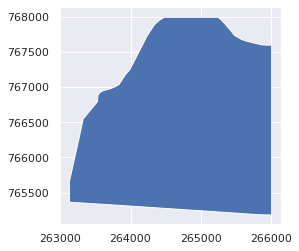

In [4]:
data = population.projectPolygonOnPopulation(Geometry="Katsrin")
data.plot()
data

We can create a dataframe of the buildings in this area, and "populate" it with the population data of the entire area of jurisdiction.

,geometry,total_pop,age_0_14,age_15_19,age_20_29,age_30_64,age_65_up
0,"POLYGON ((265611.719 765748.335, 265475.349 76...",7127,1704,491,1056,2870,1005


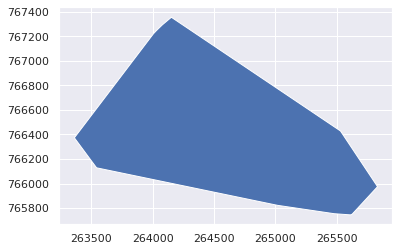

In [7]:
GISdatalayer = GIS.GIS_datalayer(projectName="Examples", FilesDirectory="/home/ofir/Projects/2020/GIS")
buildings = GISdatalayer.getGISDocuments(points=[263000,765000,266000,768000],CutName="KatsrinBuildings",mode="Buildings")[0].getData() 
Katsrin = population.populateNewArea(Geometry="KatsrinBuildings")
Katsrin.plot()
Katsrin

The function may get either a shapely polygon, a name of saved polygon or a name of a saved buildings data as the Geometry.
If the geometry is a name of a saved buildings data, as in our case, the function uses by default the largest convexed polygon
found within the area, using dataManipulation.ConvexPolygons.
If one desires to populate the polygons of the buildings themselves, it can be done this way:


,geometry,total_pop,age_0_14,age_15_19,age_20_29,age_30_64,age_65_up
0,"MULTIPOLYGON (((264428.623 765559.456, 264428....",7127,1704,491,1056,2870,1005


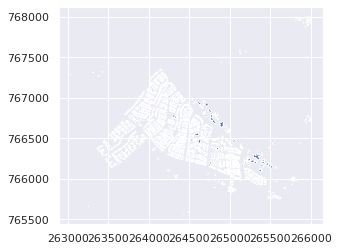

In [8]:
KatsrinBuildings = population.populateNewArea(Geometry="KatsrinBuildings", convex=False)
KatsrinBuildings.plot()
KatsrinBuildings

The function may also save the new area to the disc and add it to the database:

In [9]:
# Katsrin = population.populateNewArea(Geometry=buildings, save=True, addToDB=True, path="path for the file", name="name for the DB")

Now, this new population data may be used itself as the basic data for the projectPolygonOnPopulation function.
Suppose that we want to find the population in a smallpolygon within Katsrin. We can do it this way:

,geometry,areaFraction,total_pop
0,"POLYGON ((264000.000 766500.000, 264000.000 76...",0.116364,829.32611


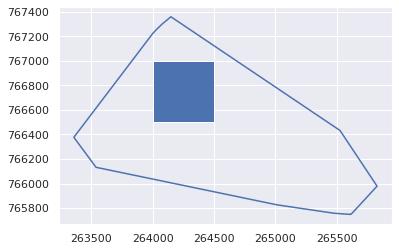

In [13]:
import shapely
import matplotlib.pyplot as plt

poly = shapely.geometry.Polygon([[264000,766500],[264000,767000],[264500,767000],[264500,766500]])
data = population.projectPolygonOnPopulation(Geometry=poly, data=Katsrin)
x,y = Katsrin.geometry[0].exterior.xy
fig, ax = plt.subplots()
ax.plot(x,y)
data.plot(ax=ax)
data

As can be seen, we have a geometry object whose area and population are about a tenth of the total area and
population of Katsrin.